<!-- ### 3 types of envs: 
#### 1. 11*11_empty 
![11*11_level1.png](/home/siyao/project/rlPractice/MiniGrid/level/11*11_level1.png)
#### 2. 6*12_empty
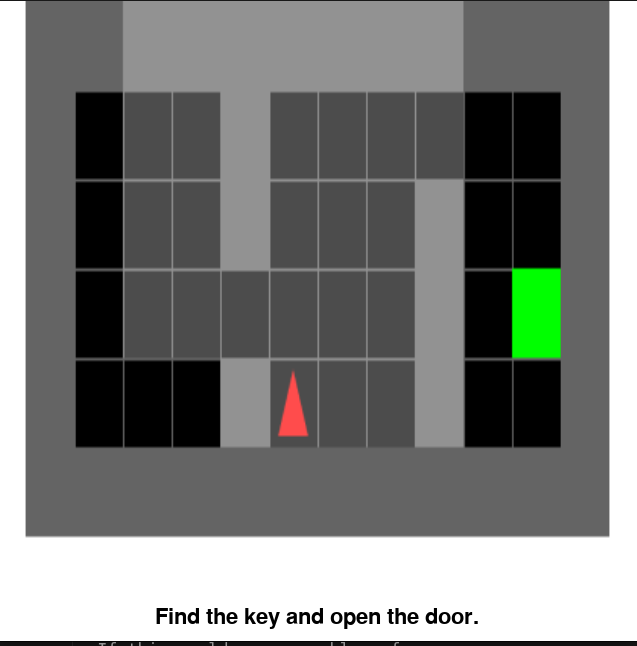
#### 3. 21*21_empty
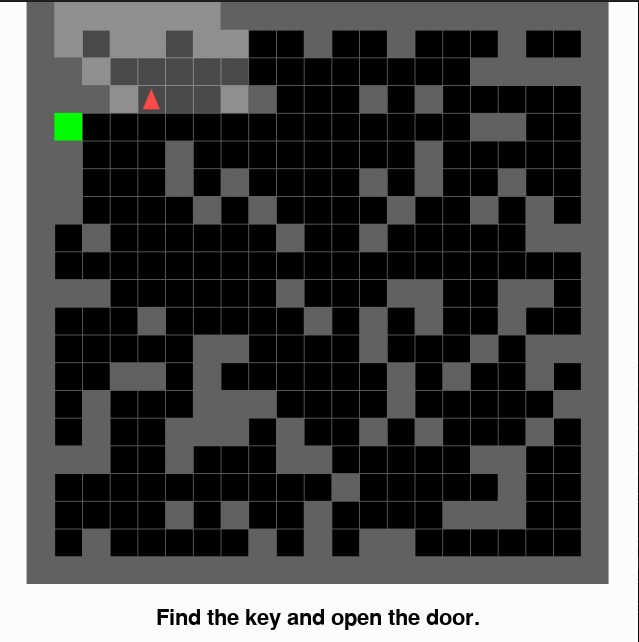
<img src="image_url" alt="21*21_empty.png" width="300" height="200">
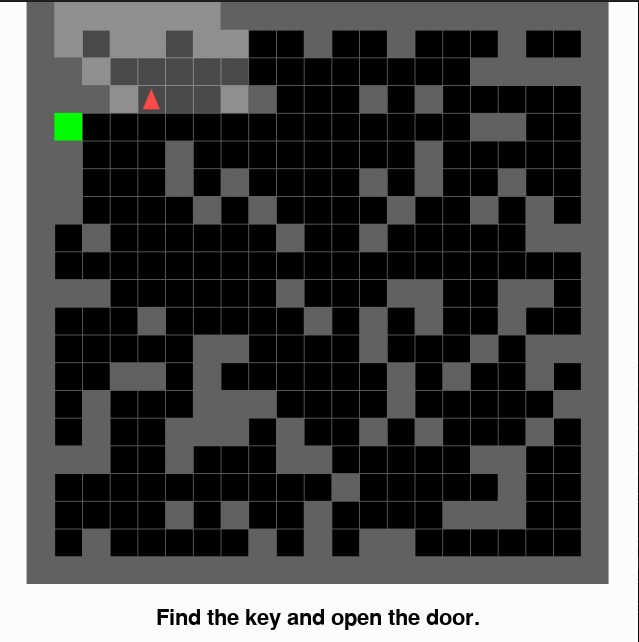


 -->


<!-- <img src="image_url" alt="description" width="300" height="200"> -->
### 3 types of env
#### 1. 11*11 env
<img src="/home/siyao/project/rlPractice/MiniGrid/level/11*11_level1.png" alt="Example Image" width="300">

#### 2. 6*12 env
<img src="/home/siyao/project/rlPractice/MiniGrid/level/6*12_empty.png" alt="Example Image" width="300">

#### 3. 21*21 env
<img src="/home/siyao/project/rlPractice/MiniGrid/level/21*21_empty.png" alt="Example Image" width="300">

In [3]:
import wandb
wandb.login()

True

In [24]:
api = wandb.Api()


In [6]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "u036g7f2"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [7]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
# df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_att.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_att.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度


     loss_obs  epoch
0    0.034483      0
1    0.030231      0
2    0.030147      0
3    0.025792      0
4    0.023073      0
..        ...    ...
495  0.000047      4
496  0.000075      4
497  0.000049      4
498  0.000049      4
499  0.000040      4

[500 rows x 2 columns]
         loss
0    0.000010
1    0.000029
2    0.000043
3    0.000020
4    0.000017
..        ...
495  0.000023
496  0.000013
497  0.000014
498  0.000012
499  0.000028

[500 rows x 1 columns]
         loss
0    0.000014
1    0.000029
2    0.000032
3    0.000026
4    0.000016
..        ...
495  0.000045
496  0.000033
497  0.000020
498  0.000021
499  0.000047

[500 rows x 1 columns]


/tmp/ipykernel_9638/3521580022.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## comparison experiment for 3 structure world model (mask size = 3)
### 1. Attention-Based World model comparison

In [8]:

import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="AttentionBased WM (mask size = 3)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.0004]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()




### 2. MLP-Based world model comparison

In [9]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "imyrq7tt"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [10]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_mlp.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_mlp.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度


     loss_obs  epoch
0    0.127162      0
1    0.164274      0
2    0.083896      0
3    0.080084      0
4    0.070936      0
..        ...    ...
495  0.000565      8
496  0.000616      8
497  0.000629      8
498  0.000427      8
499  0.001372      8

[500 rows x 2 columns]
         loss
0    0.000236
1    0.000222
2    0.000120
3    0.000244
4    0.000222
..        ...
495  0.000158
496  0.000487
497  0.000103
498  0.000162
499  0.000171

[500 rows x 1 columns]
         loss
0    0.000667
1    0.001209
2    0.000237
3    0.000202
4    0.000137
..        ...
495  0.000859
496  0.000801
497  0.001562
498  0.000939
499  0.000146

[500 rows x 1 columns]


In [11]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="MLPBased WM (mask size = 3)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.01]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()

### 3. Embedding-Based world model comparison

In [12]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "obpp0fdm"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [13]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_emb.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_emb.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度

     loss_obs  epoch
0    0.061004      0
1    0.055755      0
2    0.053311      0
3    0.044260      0
4    0.051885      0
..        ...    ...
495  0.053763      8
496  0.037487      8
497  0.054871      8
498  0.052403      8
499  0.060748      8

[500 rows x 2 columns]
         loss
0    0.091150
1    0.047596
2    0.005455
3    0.007650
4    0.031363
..        ...
495  0.097285
496  0.027601
497  0.119256
498  0.077439
499  0.008023

[500 rows x 1 columns]
         loss
0    0.096183
1    0.051341
2    0.069913
3    0.044479
4    0.051419
..        ...
495  0.002537
496  0.029119
497  0.053086
498  0.053598
499  0.048023

[500 rows x 1 columns]


In [14]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="EmbeddingBased WM (mask size = 3)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.2]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()

## comparison experiment for 3 structure world model (mask size = 5)
### 1. Attention-Based World model comparison

In [15]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "94rgpd4w"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [16]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
# df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_att_mask5.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_att_mask5.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度

     loss_obs  epoch
0    0.063444      0
1    0.039516      0
2    0.015271      0
3    0.003325      0
4    0.002715      0
..        ...    ...
495  0.000032      9
496  0.000023      9
497  0.000044      9
498  0.000026      9
499  0.000026      9

[500 rows x 2 columns]
         loss
0    0.000008
1    0.000010
2    0.000015
3    0.000016
4    0.000008
..        ...
495  0.000008
496  0.000011
497  0.000009
498  0.000009
499  0.000009

[500 rows x 1 columns]
         loss
0    0.000044
1    0.000008
2    0.000008
3    0.000011
4    0.000011
..        ...
495  0.000007
496  0.000012
497  0.000011
498  0.000224
499  0.000035

[500 rows x 1 columns]


In [17]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
# steps2 = list(range(len(df2)))  # Generate step indices
# steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="AttentionBased WM (mask size = 5)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.0006]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()

### 2. MLP-Based world model comparison

In [28]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "a7kzl4av"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [29]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_emb.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_emb.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度

     loss_obs  epoch
0    0.069016      0
1    0.063338      0
2    0.052529      0
3    0.051161      0
4    0.049332      0
..        ...    ...
495  0.001786      0
496  0.001059      0
497  0.005019      0
498  0.000247      0
499  0.001671      0

[500 rows x 2 columns]
         loss
0    0.091150
1    0.047596
2    0.005455
3    0.007650
4    0.031363
..        ...
495  0.097285
496  0.027601
497  0.119256
498  0.077439
499  0.008023

[500 rows x 1 columns]
         loss
0    0.096183
1    0.051341
2    0.069913
3    0.044479
4    0.051419
..        ...
495  0.002537
496  0.029119
497  0.053086
498  0.053598
499  0.048023

[500 rows x 1 columns]


In [31]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="MLPBased WM (mask size = 5)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[10, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.1]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()

### 3. Embedding-Based world model comparison

In [21]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "lrnoe6ky"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [22]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_emb_mask5.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_emb_mask5.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度

     loss_obs  epoch
0    0.046544      0
1    0.018910      0
2    0.021688      0
3    0.014361      0
4    0.013339      0
..        ...    ...
283  0.009608     19
284  0.018328     19
285  0.010859     19
286  0.014164     19
287  0.015621     19

[288 rows x 2 columns]
         loss
0    0.004786
1    0.027721
2    0.015858
3    0.017911
4    0.004923
..        ...
495  0.001627
496  0.002840
497  0.015022
498  0.024043
499  0.011922

[500 rows x 1 columns]
         loss
0    0.001212
1    0.024749
2    0.028125
3    0.039392
4    0.027000
..        ...
495  0.013781
496  0.014267
497  0.002824
498  0.001268
499  0.028095

[500 rows x 1 columns]


In [23]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1(training)',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="EmbeddingBased WM (mask size = 5)",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 300]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.05]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()